# Exercise 4.9b

### Content List:
#### -- Importing libraries & datasets
#### -- Creating a bar chart, a histogram, a scatterplot, and a line chart
#### -- Descriptive findings about sales (histogram)
#### -- Distribution of orders among customers in terms of loyalty
#### -- Difference in expenditure (“prices”) by hour of day
#### -- Customer demographics: Dependants by Age
#### -- Customer demographics: Income by Age
#### -- Export visualizations

## Importing libraries & datasets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path variable
path = r'/Users/jsok/Instacart Basket Analysis'

In [3]:
# import project data
ords_prods_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_all.pkl'))

## Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

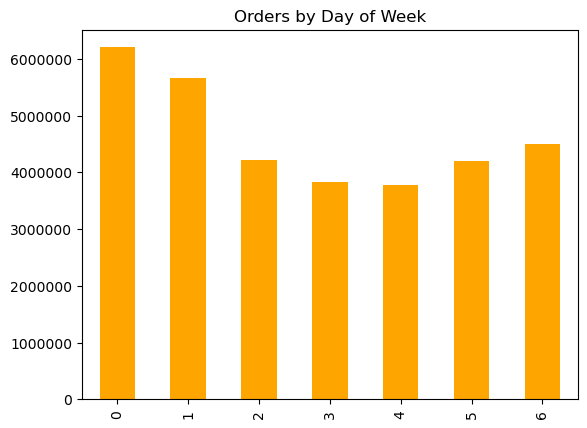

In [4]:
# Viz 1. Bar chart for orders by dow
# order_dow in index order
bar = ords_prods_all['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['orange'])

plt.title('Orders by Day of Week') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

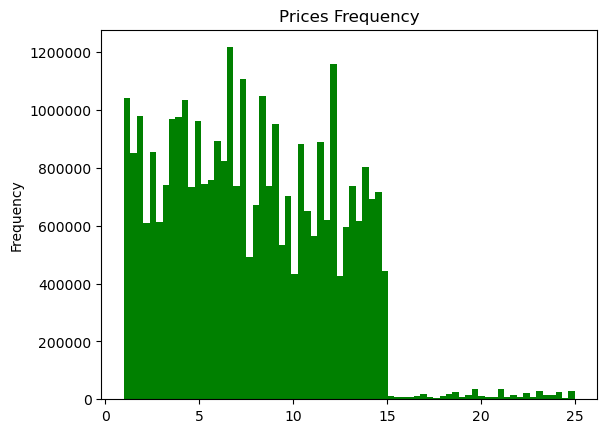

In [5]:
# Viz 2. Histogram for 'prices' column
# increase granularity
hist = ords_prods_all['prices'].plot.hist(bins = 70, color =['green'])

plt.title('Prices Frequency') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

Text(0.5, 1.0, 'Prices vs. Prices Scatterplot')

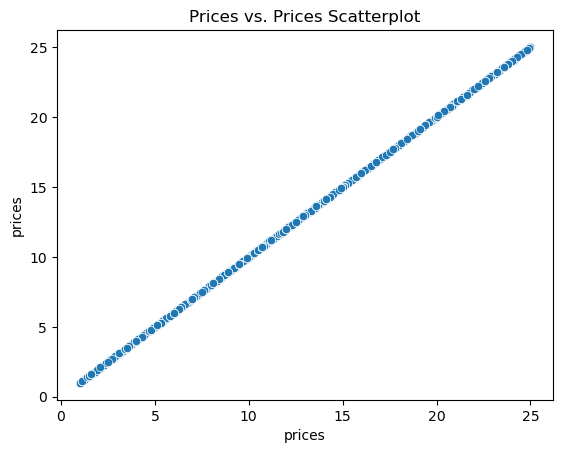

In [6]:
# Viz 3. Scatterplot of prices vs prices
scat = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_all)

plt.title('Prices vs. Prices Scatterplot') # add title

In [7]:
# Viz 4. Line chart with sample subset
#
# set a random seed: 4
np.random.seed(4)

In [8]:
# create a list 'dev' that stores boolean values
# 70/30 split
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [9]:
# list of boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# store 70% of the sample in 'big' df
big = ords_prods_all[dev]

In [11]:
# store 30% of the sample in 'small' df
small = ords_prods_all[~dev]

#### check if lengths match

In [12]:
len(ords_prods_all)

32404859

In [13]:
len(big) + len(small)

32404859

In [14]:
# SAMPLE 30% df with only 2 columns necessary for line chart
df = small[['order_day_of_week','prices']]

Text(0.5, 1.0, 'Instacart Prices per Day of Week')

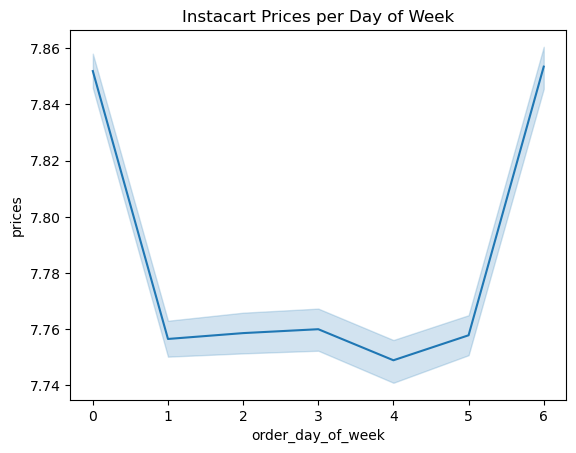

In [15]:
# Viz 4. Line chart with sample subset
# line chart of 'small' sample df
line = sns.lineplot(data = df, x = 'order_day_of_week',y = 'prices')

plt.title('Instacart Prices per Day of Week') # add title

## Descriptive findings about sales (histogram)

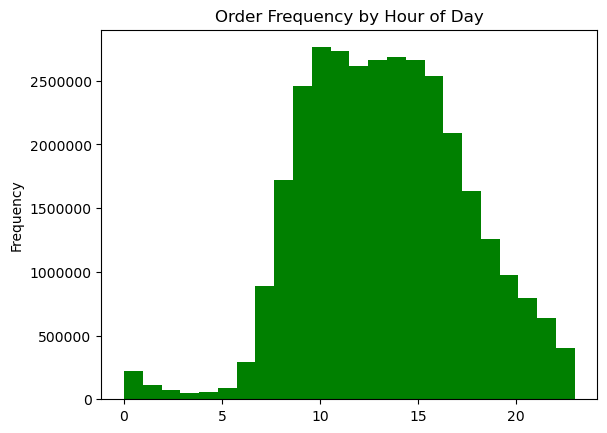

In [16]:
# Histogram for 'order_hour_of_day' column
# 24 bins for each hour of the day
hist_2 = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24, color = ['green'])

plt.title('Order Frequency by Hour of Day') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### The histogram (of 'order_hour_of_day') indicates Instacart orders mostly occur during daytime hours, and tail off when the sun sets.

## Distribution of orders among customers in terms of loyalty

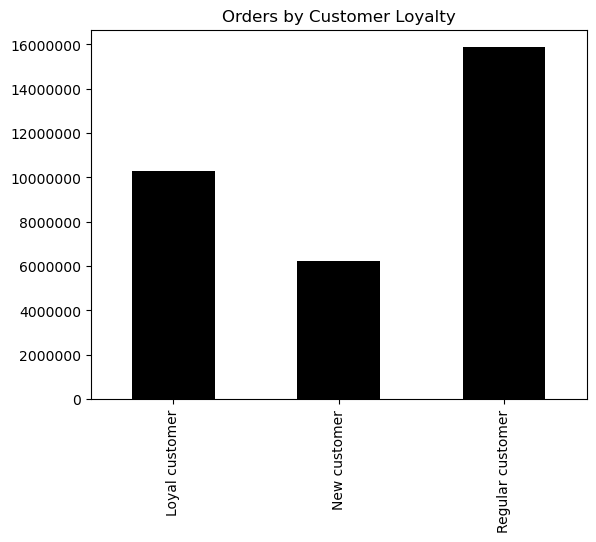

In [17]:
# Bar chart for 'loyalty_flag'
bar_2 = ords_prods_all['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['black'])

plt.title('Orders by Customer Loyalty') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

## Difference in expenditure (the “prices” column) depending on the hour of the day.

In [18]:
# set random seed
np.random.seed(4)

In [19]:
# create a list 'dev' that stores boolean values
# 70/30 split
dev2 = np.random.rand(len(ords_prods_all)) <= 0.7

In [20]:
# store 70% of the sample in 'big' df
big2 = ords_prods_all[dev2]

In [21]:
# store 30% of the sample in 'small' df
small2 = ords_prods_all[~dev2]

In [22]:
# SAMPLE 30% df2 with only 2 columns necessary for line chart
df2 = small2[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Prices by Hour of Day')

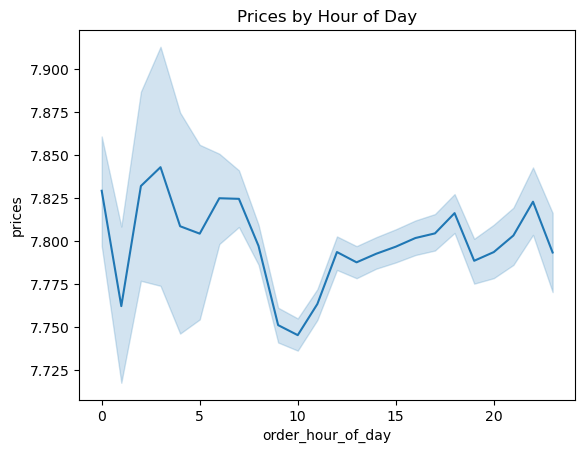

In [23]:
# line chart of 'small2' sample df2
line2 = sns.lineplot(data = df2, x = 'order_hour_of_day',y = 'prices')

plt.title('Prices by Hour of Day') # add title

## Customer demographics: Dependants by Age

In [24]:
# subset to only include relevant columns
df3 = ords_prods_all[['age','dependants']]

Text(0.5, 1.0, 'Dependants by Customer Age')

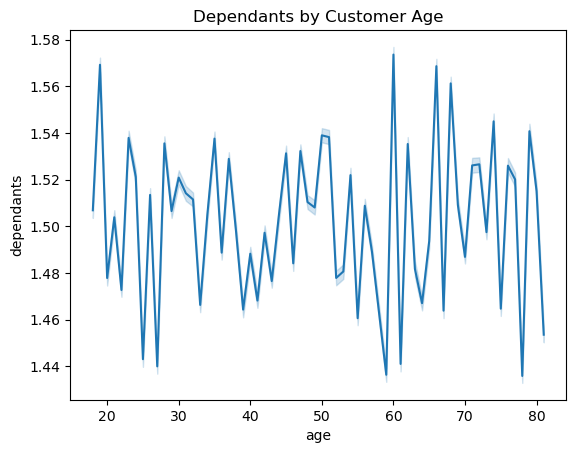

In [25]:
# line chart of 'small2' sample df2
line3 = sns.lineplot(data = df3, x = 'age',y = 'dependants')

plt.title('Dependants by Customer Age') # add title

#### The line chart above conveys how the age and number of dependants vary considerably, as no clear trend is shown.

## Customer demographics: Income by Age 

In [26]:
# new subset to only include relevant columns
df4 = ords_prods_all[['age','income']]

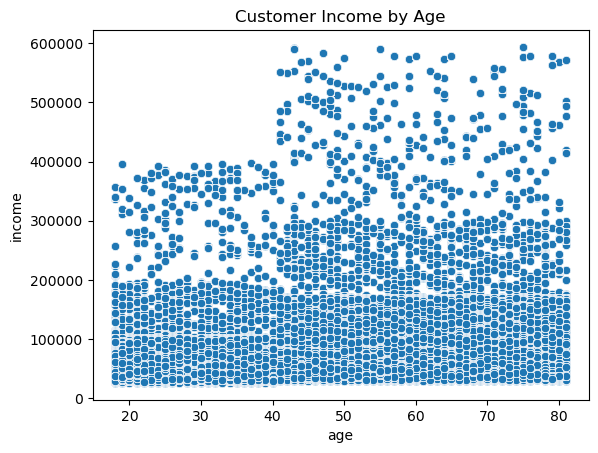

In [27]:
# create a scatterplot between 'age' and 'income'
scat2 = sns.scatterplot(x = 'age', y = 'income',data = df4)

plt.title('Customer Income by Age') # add title
plt.ticklabel_format(axis='y', style='plain') # prevent scientific notation

#### The scatterplot above shows how majority of those aged under 40 earn up to 200,000 income (with a few earning up to 400,000).  Those aged above 40 mostly earn up to 300,000 income (with a few earning up to 600,000).  This scatterplot reveals that those 40 and older have more income to spend on Instacart.

## Export visualizations

In [28]:
# Exporting visualiztions one by one...
bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_orders_dow.png'))

In [29]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'))

In [30]:
scat.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat_pricesprices.png'))

In [31]:
line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_dow_prices.png'))

In [32]:
hist_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist2_order_hour.png'))

In [33]:
bar_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar2_loyalty.png'))

In [34]:
line2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line2_hour_prices.png'))

In [35]:
line3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line3_age_dep.png'))

In [36]:
scat2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat2_age_income.png'))